In [6]:
import os
import sqlite3
import pandas as pd
import numpy as np
import datetime
import re
from pymystem3 import Mystem
from nltk.corpus import stopwords
import nltk
import pickle
from collections import Counter
import networkx as nx
import matplotlib.pyplot as plt

conn = sqlite3.connect(r"../../diplom.db")
cur = conn.cursor()

In [4]:
res = cur.execute("""SELECT ID, DDATE, TRANSCRIPT, DEMOCRACY_COUNT FROM ECHO ORDER BY DEMOCRACY_COUNT DESC LIMIT 25;""")
for i, date, text, count in res:
    print(i, date, count)
    with open(f'{i}.txt', 'w', encoding='utf-8') as f:
        f.write(text)

8485 2019-04-04 00:00:00 40
4873 2007-03-14 00:00:00 36
2110 2017-11-27 00:00:00 35
8049 2012-03-05 00:00:00 30
6585 2009-10-15 00:00:00 27
5647 2011-03-25 00:00:00 23
4824 2007-01-29 00:00:00 22
5507 2010-09-13 00:00:00 22
6851 2010-09-13 00:00:00 22
7373 2010-09-13 00:00:00 22
43 2013-04-05 00:00:00 21
5938 2012-06-21 00:00:00 21
7932 2011-10-12 00:00:00 21
2168 2018-01-08 00:00:00 20
4379 2021-09-09 00:00:00 20
5279 2009-09-30 00:00:00 20
8912 2007-05-18 00:00:00 20
957 2015-08-12 00:00:00 19
7036 2011-04-14 00:00:00 19
7421 2011-04-14 00:00:00 19
96 2013-06-07 00:00:00 18
5038 2007-08-21 00:00:00 18
3037 2019-09-04 00:00:00 17
4678 2005-11-17 00:00:00 17
4354 2021-08-18 00:00:00 16


In [13]:
corpus = [text[0].split() for text in cur.execute("""select CLEAN_TEXT from ECHO;""").fetchall()]
graph = [i[0] for text in corpus for i in nltk.bigrams(text) if i[1] == "демократия"]
c = Counter(graph)
adjusting = pd.DataFrame(c.most_common()).rename(columns={0: "Слово", 1: "Количество"})
adjusting["Часть"] = [i[1] for i in nltk.pos_tag(adjusting["Слово"], lang="rus")]
adj = adjusting[adjusting["Часть"].isin(["A=m", "A-PRO=m"])].reset_index(drop=True)
s = adj["Количество"].sum()
adj["Процент"] = round(adj["Количество"]/s*100, 2)

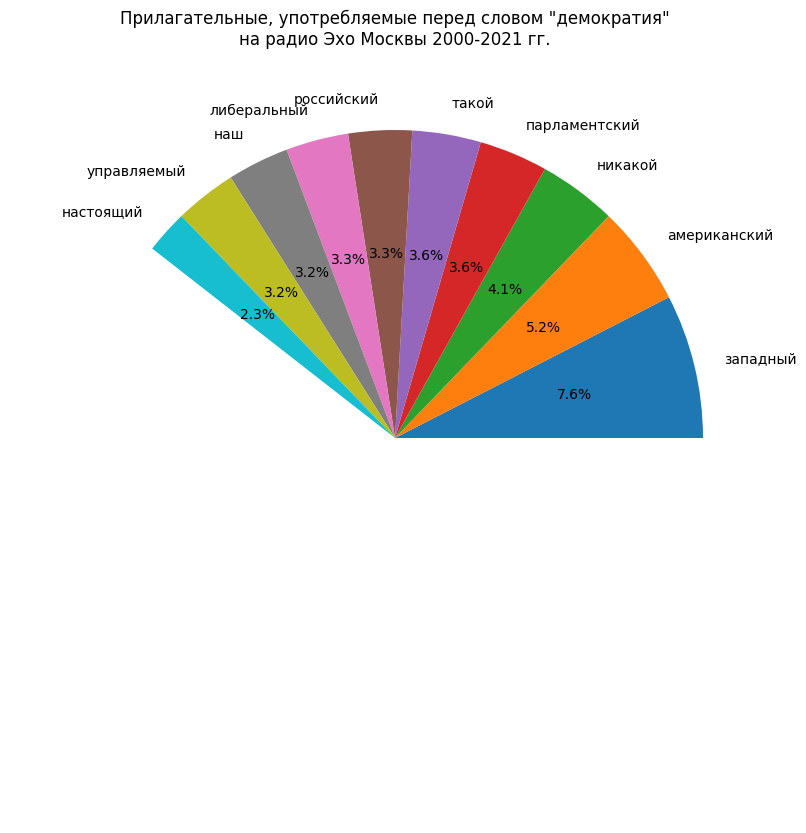

In [16]:
fig, ax = plt.subplots()
fig.set_size_inches(10, 10, forward=True)
temp2 = adj[["Слово", "Процент"]].head(10)
temp2.loc[10, "Слово"] = "Ост."
temp2.loc[10, "Процент"] = adj.loc[10:, "Процент"].sum()
wedge, text, procent = ax.pie(temp2["Процент"], labels=temp2["Слово"], autopct='%1.1f%%')
wedge[10].set_visible(False)
text[10].set_visible(False)
procent[10].set_visible(False)
ax.set_title('Прилагательные, употребляемые перед словом "демократия"\nна радио Эхо Москвы 2000-2021 гг.')
fig.savefig("echo_adj.png")

In [3]:
corpus = [text[0].split() for text in cur.execute("""select CLEAN_TEXT from ECHO""").fetchall()]
model = Word2Vec(corpus, 
                 vector_size=1024,      # embedding vector size
                 min_count=2,
                 window=5).wv
model.save("echo.model")
model.most_similar('демократия')

[('авторитаризм', 0.5756835341453552),
 ('диктатура', 0.5367075800895691),
 ('тирания', 0.5231553316116333),
 ('либерализм', 0.5187169909477234),
 ('народовластие', 0.5184821486473083),
 ('демократический', 0.5148246884346008),
 ('автократия', 0.5025543570518494),
 ('парламентаризм', 0.49467769265174866),
 ('тоталитаризм', 0.4654422700405121),
 ('суверенный', 0.4518289566040039)]